### K-means clustering

 - An unsuperivsed algorithm
 - Very useful when you ignore the number of "true" clusters in the data (so when you're dealing with "unlabeled" data)
 - K-means partitions n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid)
 - Cluster evaluation:
     - The inertia attribute measures how spread out the clusters are
     - How spread out the samples within each cluster are
     - Intuition: measure the distance of each sample from the cluster's centroid
     - Clusters should not be far spread out so low intertia values are better
     - k-means attempts to minimize inertia when choosing clusters
 - More clusters give lower inertia, but inertia decreases more slowly with the number of clusters
 - So good clustering has tight but not too many clusters
 - Rule of thumb: select the number of clusters that corresponds to the "elbow" in the inertia plot (this is where the rate of inertia decrease is significantly lower than the previous cluster/inertia combination)
 - In K-means clustering, the variance of a feature corresponds to its influence on the clustering algorithm, so you must first scale your data (transform so that the features have equal variance
 - Learn more: https://en.wikipedia.org/wiki/K-means_clustering

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
wines = load_wine()
features = pd.DataFrame(wines['data'], columns = wines['feature_names'])

target = pd.DataFrame(wines['target'], columns=['type'])

df = pd.concat([target,features],axis=1)
df.shape

(178, 14)

#### Trying out KMeans

In [3]:
# Wine varieties
varieties = target.iloc[:,0]

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=3)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)

# Fit the pipeline to samples
pipeline.fit(features)

# Calculate the cluster labels: labels
labels = pipeline.predict(features)

# Create a DataFrame with labels and species as columns: df
ct = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct_show = pd.crosstab(ct['labels'], ct['varieties'])

# Display ct
print(ct_show)


varieties   0   1   2
labels               
0           0   3  48
1          59   3   0
2           0  65   0


#### With train-test-split

In [8]:
features = pd.DataFrame(scale(wines['data']), columns = wines['feature_names'])


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=242)

In [111]:
# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(X_train)

# Determine the cluster labels of new_points: labels
labels = model.predict(X_test)

# Print cluster labels of new_points
print(labels)



[0 1 2 1 2 1 0 1 0 0 1 2 0 0 1 2 0 2 0 0 2 1 0 1 1 1 0 1 2 2 0 2 0 2 2 1 1
 1 2 2 2 1 1 2 0 2 1 2 2 1 0 0 1 2]


'Centroids'

(3, 13)

array([[ 0.13717456,  0.83286834,  0.2188527 ,  0.51700753, -0.11838092,
        -0.95935351, -1.20430571,  0.75279123, -0.88053711,  0.80023961,
        -1.06858263, -1.26220104, -0.46052709],
       [ 0.90098006, -0.24138741,  0.30515936, -0.7457025 ,  0.5047398 ,
         0.93047648,  0.95240029, -0.58648069,  0.50082503,  0.14820185,
         0.42849751,  0.85034077,  1.08425272],
       [-0.89646772, -0.3410257 , -0.75488951,  0.00618939, -0.52951904,
        -0.10931662, -0.0133223 , -0.1725135 ,  0.07006587, -0.91372281,
         0.57432948,  0.30929853, -0.73506584]])

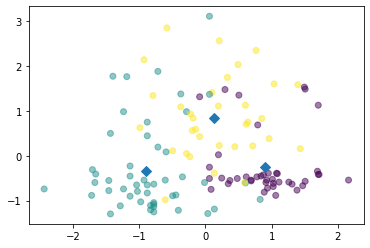

In [117]:
# Assign the columns of new_points: xs and ys

xs = X_train.iloc[:,0]
ys = X_train.iloc[:,1]
labels = y_train.iloc[:,0]

# Assign the cluster centers: centroids
centroids = model.cluster_centers_
display('Centroids', centroids.shape, centroids)

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys, c=labels, alpha=0.5)

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()


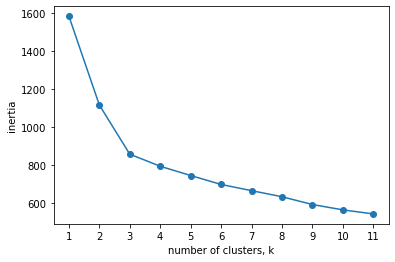

In [118]:
ks = range(1, 12)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(X_train)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


#### Note that Normalizer() is different to StandardScaler(). While StandardScaler() standardizes features by removing the mean and scaling to unit variance, Normalizer() rescales each sample - e.g. stock prices - independently of the other.

Cluster companies by their daily stock price movements - So which company stock prices tend to change in the same way?

In [166]:
etfs = pd.read_csv('ml_assets/etfs.csv',index_col='Dates')
movements = etfs.pct_change(1).dropna(axis=0).T.iloc[:,1:]

In [188]:
# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 6 clusters: kmeans
kmeans = KMeans(n_clusters=7)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)

# Predict the cluster labels: labels
labels = pipeline.predict(movements)

In [189]:
# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'etfs': list(movements.index)})

df.sort_values('labels')['labels'].value_counts()

0    33
5    17
4    15
6    10
2     7
1     5
3     3
Name: labels, dtype: int64

In [191]:
for i in set(df['labels']):
    display('Cluster '+ str(i), df[df['labels']==i]['etfs'].values)

'Cluster 0'

array(['IUSN', 'SWDA', 'EXXT', 'QDVE', 'WCOD', 'QDVK', '2B77', 'RBOT',
       'IH2O', 'SMH', 'CSNKY', 'EUNI', 'IUS3', 'HYLD', 'IWQU', 'IWSZ',
       'GMVM', 'AYEW', 'IWMO', 'IUSA', 'WTEL', 'XLIS', 'XLBS', 'XLKS',
       'XLYS', 'IU5C', 'WMAT', 'WTCH', 'SPYY', 'VWCE', 'WIND', 'MOAT',
       'PORT'], dtype=object)

'Cluster 1'

array(['IGLT', 'AGGH', 'IEAC', 'IEAG', 'SEGA'], dtype=object)

'Cluster 2'

array(['EUNX', 'IBTS', 'IBTM', 'IEMB', 'LQDE', 'CORP', 'IHYU'],
      dtype=object)

'Cluster 3'

array(['WNRG', 'XLES', 'EXH1'], dtype=object)

'Cluster 4'

array(['WFIN', 'EXS1', 'ISF', 'EMBE', 'QDVH', 'ECAR', 'DJSC', 'EXV5',
       'EXV1', 'IWVL', 'EUN2', 'XLFS', 'EXV3', 'EXSA', 'EXV9'],
      dtype=object)

'Cluster 5'

array(['WCLD', 'VOLT', '2B70', 'DGTL', 'HEAL', 'CEMG', 'DAVV', 'L0CK',
       'ESP0', 'WELL', 'ITEK', 'UNIC', 'HDRO', 'WCBR', 'EIMI', 'WTAI',
       'INRG'], dtype=object)

'Cluster 6'

array(['WCOS', 'IWDP', 'CBUF', 'MVOL', 'XLPS', 'XLVS', 'XLUS', 'WHEA',
       'QDVG', 'WUTI'], dtype=object)

### Hierarchical clustering

- Aggloromative clustering:
 - In the beginning each "data point" (e.g. country, stock, question) is its own cluster
 - As many clusters as data point
 - At each step, clusters are merged (the two closest data points)
 - At the end, there is only one super-cluster remaining with all the data points contained in it
 - Clustering happens "bottom-up", with vertical lines indicating the two merging of two clusters in a single entity
 - For a sample of "N countries" there will be "N-1" merge operations


- Divisive clustering:
 - The opposite process (top-down)


- Use the linkage() function to obtain a hierarchical clustering of the samples, and use dendrogram() to visualize the result


- In the dataframe movements, the rows correspond to companies, and the columns to dates. SciPy hierarchical clustering doesn't fit into a sklearn pipeline, so you'll need to use the normalize() function from sklearn.preprocessing instead of Normalizer


- Height in dendrograms
  - distance between merging clusters, the y-axis of the dendrogram encodes the distance between merging clusters
  - distance is measured using a linkage method (e.g. complete where the linkage between two clusters was the maximum distances between their samples)
  - in complete linkage, the distance between clusters is the distance between the furthest points of the clusters. In single linkage, the distance between clusters is the distance between the closest points of the clusters.
  - different linkage methods give different hierarchical clustering


- Learn more: https://en.wikipedia.org/wiki/Hierarchical_clustering

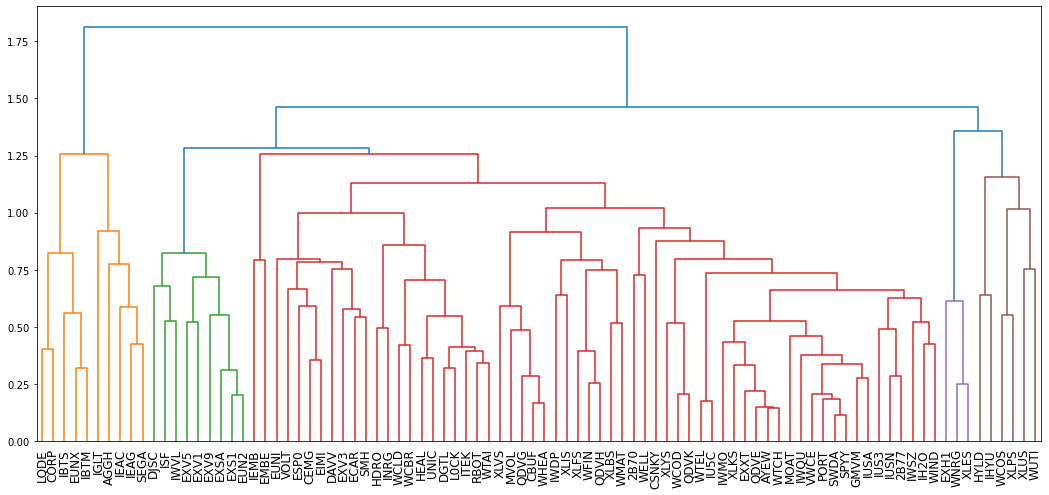

In [216]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import normalize

# Calculate the linkage: mergings
norm_movements = normalize(movements)
mergings = linkage(norm_movements, method='complete')

plt.figure(figsize=(18,8))

# Plot the dendrogram, using etf names as labels
dendrogram(mergings,
           labels=movements.T.columns,
           leaf_rotation=90,
           leaf_font_size=12,
)

plt.show()


In [231]:
from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
y_axis_height_threshold = 1.3
labels = fcluster(mergings, y_axis_height_threshold, criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': movements.T.columns})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties']).T

# Display ct
print(ct)
print(ct.sum())

labels     1  2  3  4
varieties            
2B70       0  1  0  0
2B77       0  1  0  0
AGGH       1  0  0  0
AYEW       0  1  0  0
CBUF       0  1  0  0
...       .. .. .. ..
XLKS       0  1  0  0
XLPS       0  0  0  1
XLUS       0  0  0  1
XLVS       0  1  0  0
XLYS       0  1  0  0

[90 rows x 4 columns]
labels
1    10
2    71
3     3
4     6
dtype: int64


#### t-distributed stochastic neighbor embedding (t-SNE)

- Used to create a 2-dimensional map (or 3-d) from multiple dimensions of features
- Does not have separate fit and transform methods
- You cannot extend the map to incorporate new samples (must run it anew)
- Learning rate:
    - a hyperparameter to calibrate the model
    - depends highly on the dataset
    - usually a value betwenn 50 and 200
- Scatter ploy axes not interpretable and vary each time
- Learn more: https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding

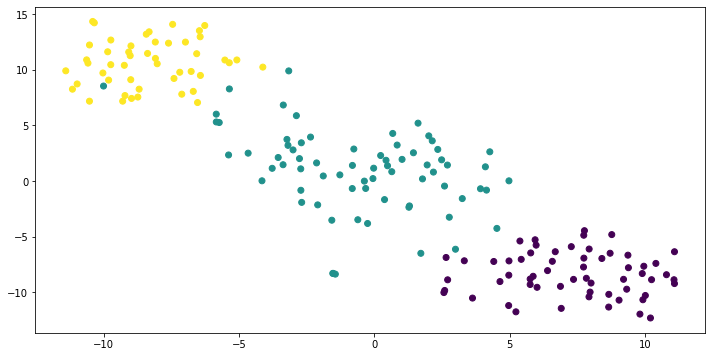

In [246]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(features)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.figure(figsize=(12,6))
plt.scatter(xs, ys, c=target.values)
plt.show()


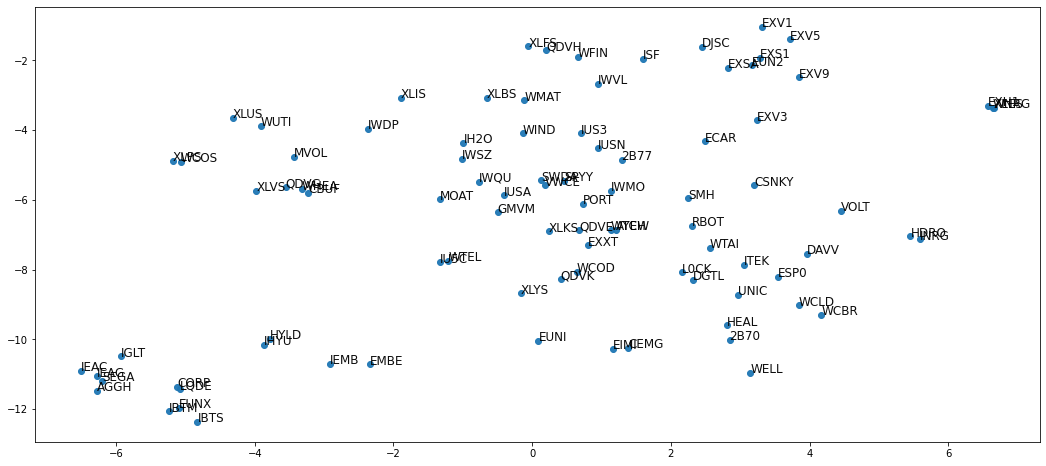

In [253]:
# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(norm_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.figure(figsize=(18,8))

plt.scatter(xs, ys, alpha=0.95)

# Annotate the points
for x, y, company in zip(xs, ys, movements.T.columns):
    plt.annotate(company, (x, y), fontsize=12, alpha=0.95)
plt.show()
